<h1><center><bold>ImageMining:
Atelier N°1: CBIR</bold>

Hicham Bayad  <br/>
S148011841  <br/>
 hicham98bayad@gamil.com</center></h1>

Table des matières
<ul>
1	Introduction </br>
2	Base d’images</br>
3	Implémentation</br>
 
> 3.1	Lecture des images</br> 
3.2	Recherche par image entière</br>
3.3	Recherche par Couleur</br>
3.4	Recherche par Histogramme</br>
3.5	Recherche par texture</br>
3.1	Recherche par Forme</br>
3.2	Etude comparative</br>
3.3	Robustesse vis-à-vis des transformations géométriques</br>

4	Conclusion</br>


---
<h2>1	Introduction</h2>
L’objectif de cet atelier est d’initier le lecteur aux systèmes de recherches basées sur le contenu (CBIR, Content Based Image Retrieval). Le CBIR permet entre autres de rechercher les images similaires à une image requête dans une base, constituées, d’images. Cette similarité est calculée non pas sur les images elles-mêmes mais par le biais d’une description (descripteur) choisie par celui qui a conçu le système. La figure ci-dessous présente une vue globale d’un système CBIR.



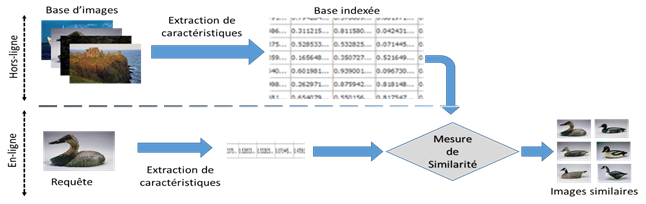

In [14]:
#from google.colab import drive
#drive.mount('/content/drive')

Un système CBIR est organisé en deux phases :

1.	Phase hors ligne, appelée souvent indexation, où pour chaque image un vecteur descripteur sera extrait et sauvegarder sous forme de base d’indexes
2.	Phase en ligne, appelée souvent recherche, où le système recherche les images similaires à une image requête. Le même type de descripteur sera extrait de l’image requête et comparé avec la base d’indexes. 

Deux paramètres sont à prendre en considération lors de l’élaboration d’un système CBIR; le premier est la nature des descripteurs (appelés aussi caractéristiques) à utiliser pour former la base d’indexes, et le deuxième c’est la mesure de similarité à utiliser pour chercher les images les plus similaires pour une image requête. Ainsi, la recherche ce fait par mesure de distance entre descripteurs au lieu des images. 

Les descripteurs utilisés pour former la base d’indexes sont généralement des descripteurs bas niveau, à savoir ; la forme, la couleur et la texture. Et la mesure de similarité utilisée peut être une simple distance euclidienne ou une projection multidimensionnelle. 

<h2>2	Base d’images</h2>
Pour cet atelier nous allons utiliser une partie de la base d’images COREL. La base COREL contient 10800 images classées en 80 groupes d’images. Cette base est parfaite pour comprendre les fondamentaux du CBIR. Ici, nous allons utiliser seulement 270 images appartenant à deux groupes d’images et qui sont regroupées dans seule dossier. <br>
Il faut charger la base aprés l'avoir décompresser sur votre espace Drive. Il est possible d'utiliser une base compresser (.*zip) et la décompresser par code python.

<h2>3	Implémentation</h2>
Afin de développer notre système CBIR nous avons opté, dans cet atelier, pour Matlab comme environnement de travail car il est très puissant dans le traitement matriciel et ainsi pour le traitement d’images de même que plusieurs fonctionnalités sont déjà implémentées permettant de créer facilement notre CBIR.

Pour la première étape qui est l’indexation, le premier code à écrire est pour parcourir toutes les images de la base de données pour extraire de chacune un vecteur descripteur convenable. 
- Copier la base d’images dans le dossier par défaut de Matlab pour éviter les 
- Ne pas écrire le code directement sur l’invite de commande mais plutôt créer un ou plusieurs fichiers *.m, les modifier et les exécuter à fur et à mesure de l’avancement de cet atelier. 

<h2>3.1	Lecture des images</h2>
L’objectif du premier code  est de lire toutes les images de la base et d’afficher les 6 premières


In [3]:
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab


path='DataSet\obj_decoys'
#path='DataToPredict'#'DB2C\\obj_car'
nameImages=[]
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    #nameImages.append(filename)
    loaded_images.append(img_data)
    if(path == 'DataToPredict'):
        nameImages.append(path+'/' + filename)
    
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  #print(' %s %s ' % (filename, img_data.shape))
    print(' %s %s ' % (filename, img_data.shape))

 382001.jpg (80, 120, 3) 
 382002.jpg (80, 120, 3) 
 382006.jpg (80, 120, 3) 
 382007.jpg (80, 120, 3) 
 382012.jpg (80, 120, 3) 
 382013.jpg (80, 120, 3) 
 382014.jpg (80, 120, 3) 
 382017.jpg (80, 120, 3) 
 382018.jpg (80, 120, 3) 
 382019.jpg (80, 120, 3) 
 382020.jpg (80, 120, 3) 
 382021.jpg (80, 120, 3) 
 382022.jpg (80, 120, 3) 
 382025.jpg (80, 120, 3) 
 382026.jpg (80, 120, 3) 
 382028.jpg (80, 120, 3) 
 382029.jpg (80, 120, 3) 
 382030.jpg (80, 120, 3) 
 382032.jpg (80, 120, 3) 
 382033.jpg (80, 120, 3) 
 382034.jpg (80, 120, 3) 
 382035.jpg (80, 120, 3) 
 382037.jpg (80, 120, 3) 
 382038.jpg (80, 120, 3) 
 382039.jpg (80, 120, 3) 
 382041.jpg (80, 120, 3) 
 382042.jpg (80, 120, 3) 
 382043.jpg (80, 120, 3) 
 382044.jpg (80, 120, 3) 
 382045.jpg (80, 120, 3) 
 382047.jpg (80, 120, 3) 
 382050.jpg (80, 120, 3) 
 382051.jpg (80, 120, 3) 
 382053.jpg (80, 120, 3) 
 382054.jpg (80, 120, 3) 
 382056.jpg (80, 120, 3) 
 382061.jpg (80, 120, 3) 
 382062.jpg (80, 120, 3) 
 382063.jpg 

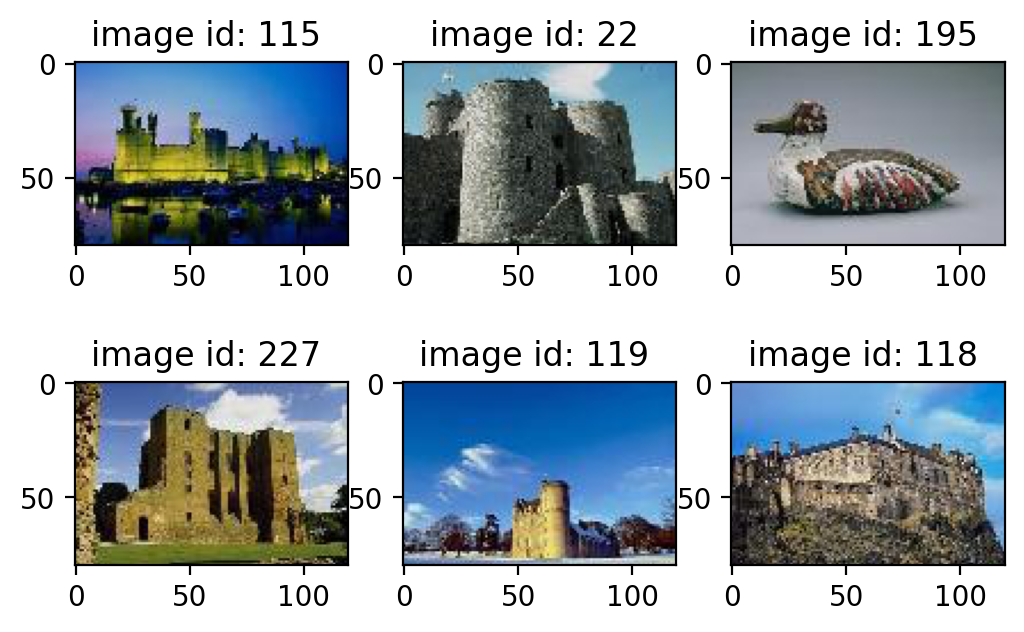

In [4]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(len(loaded_images)), 6)
for i in range(6):
  ax1 = fig.add_subplot(3, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))


<h2>3.2	Recherche par image entière</h2>
Pour une première implémentation d’un système CBIR, l’objectif est d’afficher les 5 images les plus similaires à l’image requête « Imrequest.jpg » en se basant sur un calcul de différence entre images entières.<br>
L'image requete est dans un dossier "img_requetes" dans Drive

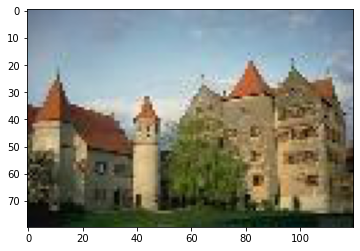

In [6]:
img_requete = image.imread('DataSet\imageRequest.jpg')
plt.imshow(img_requete) 


In [7]:
import numpy as np
np.shape(img_requete)

#img_requete

(80, 120, 3)

Nous allons utiliser la distance enclidienne entre l'image requéte et toutes 

1.   Élément de liste
2.   Élément de liste

les images de la base. Les distances seront enregistrées dans un dictionnaire et seront par la suite triées par ordre croissant. 

In [8]:
# Il faut convertir les matrices 3D en un vecteur 1D en utilisant la méthode flatten()
x=img_requete.flatten() 

In [9]:
x

array([102, 118, 141, ...,  12,  25,  16], dtype=uint8)

In [10]:
# Comparer les pixels des deux images utilisant une distance enculidienne
import scipy.spatial.distance as dist
# penser à utiliser un dictionnaire pour garder les indices aprés tri
distances = {}

for i in range (len(loaded_images)):
    img_base=loaded_images[i].flatten()
    img_request=img_requete.flatten()
    distances[i]=dist.euclidean(img_base, img_request)
  # Code pour calculer la distance eulcidienne entre l'image requête et les images de la base
  # Il faut convertir les matrices 3D en un vecteur 1D en utilisant la méthode flatten()
  # Utiliser la méthode dist.euclidean(Vecteur1, vecteur2)
# Code pour trier les distances par ordre croissant
distancesTrie=[]
for key , value in sorted(distances.items(), key=lambda x: x[1]):
 # print(distancesTrie)
    print("%s : %s " % (key , value))
    distancesTrie.append((key,value)) 
print(len(distancesTrie))
print(distancesTrie)

47 : 0.0 
108 : 18578.60180422628 
212 : 20310.46978777202 
211 : 20464.306242821916 
101 : 20595.652429578433 
218 : 20646.523193990797 
213 : 20851.56063703626 
78 : 20951.391170993873 
72 : 21130.09178872633 
216 : 21206.327593433052 
157 : 21263.001034661123 
215 : 21349.510533030963 
18 : 21602.157924614847 
124 : 21629.906934612547 
135 : 21711.747304166933 
244 : 21779.871257654395 
214 : 21882.94708214595 
75 : 21945.314123976445 
34 : 22080.62098311549 
17 : 22131.295465923362 
259 : 22158.568500695164 
86 : 22163.63724662538 
233 : 22214.52596838384 
229 : 22346.147117568165 
13 : 22381.631575915104 
131 : 22507.39656201934 
4 : 22508.459187603225 
120 : 22510.514876386103 
94 : 22525.995538488416 
217 : 22560.297249814772 
132 : 22629.793680013965 
105 : 22640.56993540578 
158 : 22664.977057124943 
80 : 22768.71704773899 
91 : 22826.22268357163 
1 : 22861.16845220296 
12 : 23095.406296491085 
100 : 23114.48692919659 
156 : 23136.34396355656 
113 : 23165.966696859425 
129 : 2

Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

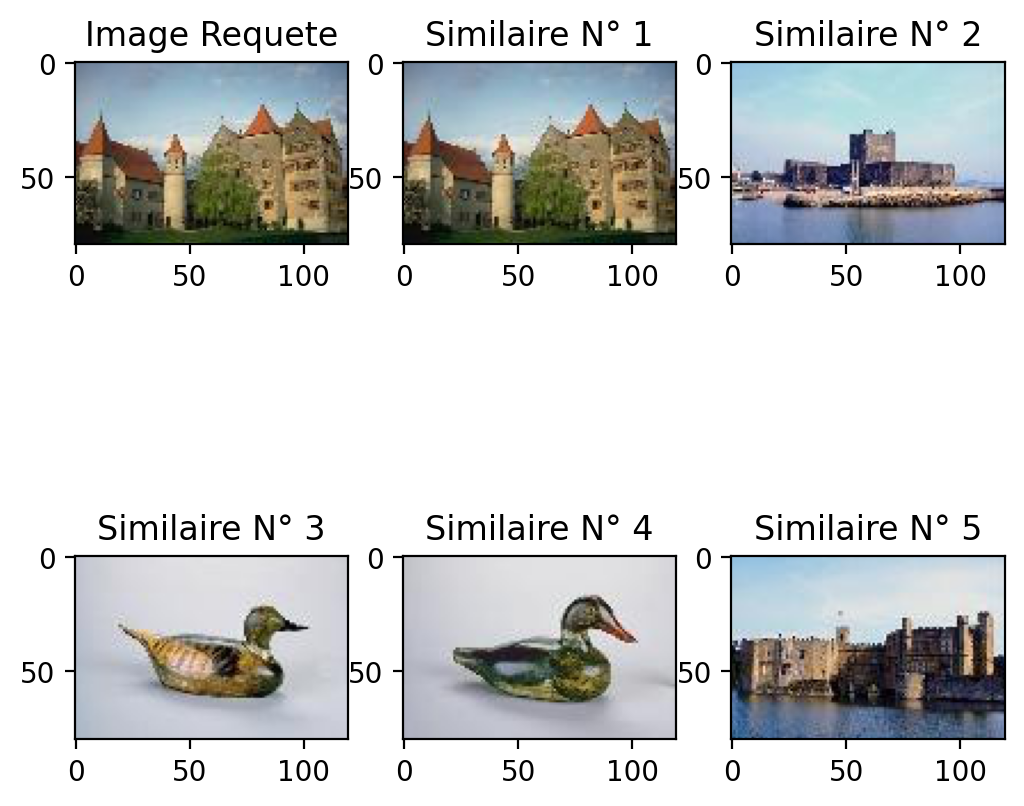

In [11]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    e=distancesTrie[i][0]
    ax1.imshow(loaded_images[e])
    ax1.set_title('Similaire N° %s' %(i+1))

La première image trouvée est identique à l’image requête ce qui montre que le système développé a pu répondre à la requête correctement tandis que les autres images ne sont pas visuellement très similaires. L’autre inconvénient et qui est majeur et qu’il est long en termes de temps de recherche et très gourment en mémoire. Ainsi, le temps de recherche sur la base de seulement 270 images est de 45 secondes. Aussi, il n’est pas du tout robuste vis-à-vis des transformations sur l’image. Pour exemple vous pouvez roter l’image requête et vous allez voir que le résultat est complétement erroné. <br>
L’idéal est, qu’au lieu de chercher sur la totalité des images, d’utiliser avec des caractéristiques (descripteurs) de chaque image. 3 types de caractéristiques sont les plus utilisées dans un système CBIR : la Couleur, la Forme et la Texture. <br>
Par la suite, nous allons présenter et utiliser chacune des 3 caractéristiques pour créer un système CBIR performant et puissant.

<h2>3.3	Recherche par Couleur</h2>
Dans cette partie, la caractéristique couleur sera utilisée pour développer notre système CBIR. Contrairement à la recherche par similarité sur toute l’image qui consiste à calculer la différence entre l’image requête et toutes les images de la base, et ceci à chaque recherche, le CBIR consiste dans sa partie hors-ligne de créer une base d’index à base des caractéristiques des images de la base et la recherche est effectuée par similarité entre caractéristiques de l’image requête et caractéristiques de la base d’index. Tout cela nous ramène à dire que la première étape est d’extraire, une fois pour toute, les caractéristiques couleurs des images de la base et l’enregistrer afin de l’utiliser dans chaque recherche. <br>
Le vecteur descripteur couleur à utiliser est constitué des valeurs des moments statistiques ; moyenne et variance de chaque composante couleur R, G et B. La taille du vecteur sera donc 6.<br>
Le code dans le fichier « CBIR_Color.m » permet en un premier temps d’indexer la base d’image et après de lancer la recherche pour une image requête et d’afficher les 5 images les plus similaires.
Le code contient 3 parties : <br>

1. La partie principale
2. La partie d’indexation ; la fonction « CBIR_Indexation » est appelée avec comme paramètre la taille du vecteur descripteur. Cette partie ne doit être exécutée qu’une seule fois<br>
3. La partie de recherche ; la fonction « CBIR_ Recherche » est appelée avec comme paramètres l’image requête, la matrice des descripteurs et les noms des images correspondantes.

Le vecteur descripteur est créé par la fonction « getFeatures » qui a comme arguments d’entrée l’image et la taille du vecteur. C’est cette fonction qu’on va modifier pour ajouter d’autres descripteurs par la suite. Cette fonction appelle la fonction « color_Moments » qui va retourner le les 6 moments de couleurs.


In [12]:
# la CBIR est constituée de 2 étapes; Indexation et Recherche
# On va créer une fonction pour l'indexation d'une image 
# C'est l'équivalent d'extraire une vecteur descripteur en se basant sur les moments statistiques des couleurs
import numpy as np
# la fonction color_Moment retourne un vecteur descripteur de 6 valeurs
# contenant la moyenne et la déviation standard de chaque canal RGB
# utiliser np.mean et np.std
# il faut normaliser les moments en les divisant par la moyenne
def color_Moments(img):
    colorFeatures = []
    for i in range(3):
        colorFeatures.append(np.mean(img[:, :, i]))
        colorFeatures.append(np.std(img[: , :, i]))
    
    return colorFeatures

In [13]:

# l'indexation consiste à créer une matrice d'index utilisant les moments de couleurs pour chacune des images de la base
# La méthode CBIR_Indexation retourne la matrice de caractéristiques
def CBIR_Indexation():
    features =[]
    for i in range(len(loaded_images)):
        features.append(color_Moments(loaded_images[i]))
        #print(np.shape(color_Moments(loaded_images[i])))
    
    return features
print(np.shape(CBIR_Indexation()))
print(CBIR_Indexation())
#print(len(loaded_images))


(270, 6)
[[130.70520833333333, 57.08014991693637, 135.18479166666665, 57.35566865654981, 132.65145833333332, 67.1513664693921], [131.61010416666667, 40.58993566233485, 131.5675, 43.3041571570598, 102.95052083333333, 56.16750570966632], [96.97625, 40.188849232146055, 115.30354166666666, 43.67417653247661, 79.69760416666666, 62.04243771478774], [65.32791666666667, 47.47788928185121, 71.11708333333333, 49.60327861972825, 88.3934375, 66.35084383613314], [121.7928125, 65.39991630351304, 128.0134375, 65.28369122734198, 117.15145833333334, 75.21629490148126], [115.63479166666667, 62.495627830059156, 122.93072916666667, 61.394135624273176, 106.99354166666667, 66.54670164596138], [98.3428125, 58.07042671409011, 106.5015625, 56.70542299955617, 113.80927083333333, 71.01263222050696], [113.67625, 58.76241870961547, 103.87604166666667, 60.25488438844548, 91.830625, 72.99371876248011], [89.56458333333333, 47.45594443614402, 83.55385416666667, 41.11797325657884, 87.46083333333333, 57.76861827704458],

In [14]:
print(np.shape(CBIR_Indexation())[0])

270


In [15]:

# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
#print (index_Matrix.shape)

# la recherche consiste à calculer la distance euclidienne entre le vecteur descripteur de l'image requéte et la matrice de caractéristiques
# La méthode CBIR_Recherche admet comme argument l'image requéte et la matrice de caractéristiques
# Elle retourne un disctionnaire trié contenant les distances et les indices des images

def CBIR_Recherche(Imreq,ind_Matrix):
    distances = {}
    caractéristique_Imreq=color_Moments(Imreq)
    for i in range(np.shape(ind_Matrix)[0]):
              distances[i]=dist.euclidean(ind_Matrix[i], caractéristique_Imreq)
       # for key , value in sorted(distances.items(), key=lambda x: x[1]):
    e=[]
    for key, value in sorted(distances.items(), key=lambda x: x[1]):
             print("%s: %s" % (key, value))
             e.append((key,value))
    return e

La première image trouvée est identique à l’image requête ce qui montre que le système développé a pu répondre à la requête correctement tandis que les autres images ne sont pas visuellement très similaires. L’autre inconvénient et qui est majeur et qu’il est long en termes de temps de recherche et très gourment en mémoire. Ainsi, le temps de recherche sur la base de seulement 270 images est de 45 secondes. Aussi, il n’est pas du tout robuste vis-à-vis des transformations sur l’image. Pour exemple vous pouvez roter l’image requête et vous allez voir que le résultat est complétement erroné. <br>
L’idéal est, qu’au lieu de chercher sur la totalité des images, d’utiliser avec des caractéristiques (descripteurs) de chaque image. 3 types de caractéristiques sont les plus utilisées dans un système CBIR : la Couleur, la Forme et la Texture. <br>
Par la suite, nous allons présenter et utiliser chacune des 3 caractéristiques pour créer un système CBIR performant et puissant.

In [16]:
index_Matrix=CBIR_Indexation()
#index_Matrix[0]
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
print(distanes_CBIR)

47: 0.0
51: 5.028948250474002
82: 7.835334287090585
49: 7.974394832008344
18: 14.48024620796177
17: 15.757864702614855
233: 16.48582796903712
5: 16.944184873975953
4: 16.94987693959474
41: 17.535884825822425
81: 19.214435202417366
65: 19.74181983068234
55: 20.078420386234196
227: 21.026829878148696
100: 21.03227004173846
34: 21.112907862669232
246: 21.178910149758483
60: 21.546617749399015
40: 21.982390973283376
226: 21.998058201187266
120: 22.025064288364696
12: 22.32844902597853
248: 22.390192554725825
0: 22.415259881805568
33: 22.537114384758087
132: 22.684224610238275
106: 22.784200297459893
67: 23.218036902006094
54: 23.44544081969512
50: 23.604884820721807
99: 24.320759060832366
16: 24.374920087600973
24: 24.437816537269555
241: 24.470683434151073
61: 24.753873982028757
91: 24.85290572020383
232: 24.99490786339957
222: 25.501279009898937
86: 25.545314442635988
256: 26.41471578284839
123: 27.043628268056835
89: 27.04551663624894
1: 27.210504332953416
93: 27.31582375359644
44: 27.3

Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

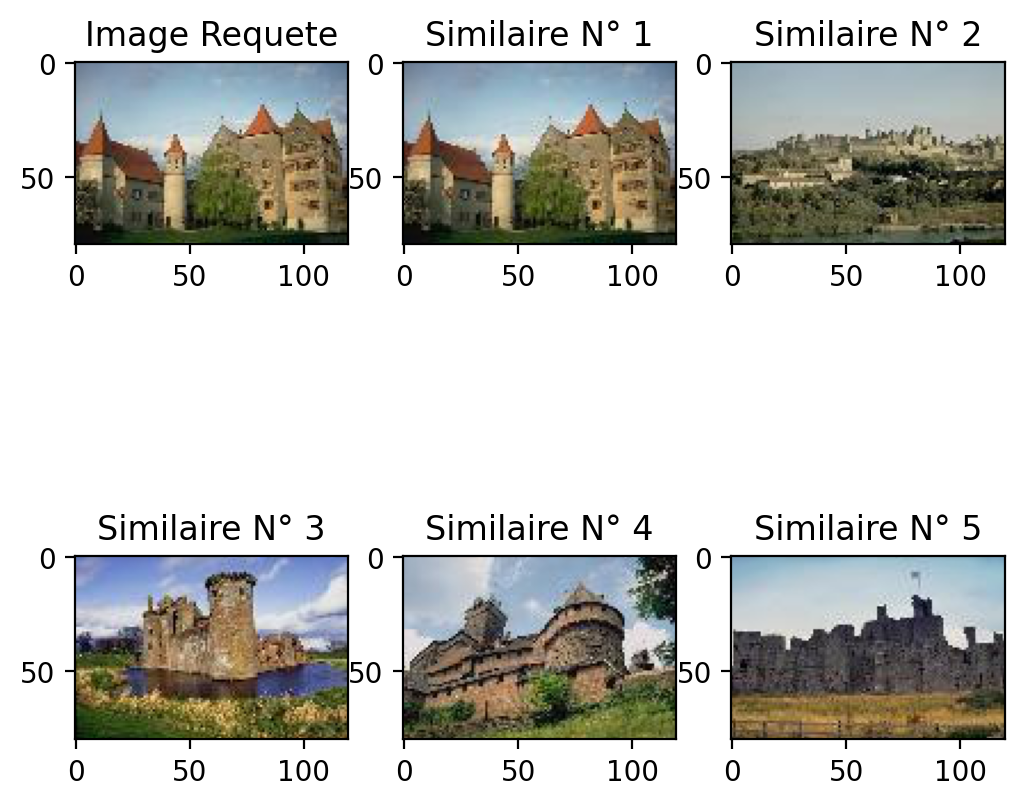

In [17]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distanes_CBIR[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

In [18]:
# Nous allons modifier l'image requéte pour voir le comportement de notre système
img_requete = image.imread('C:/Users/HP/Downloads/Compressed/DataSet/imageRequest_2.jpg')
#plt.imshow(img_requete) 
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distanes_CBIR[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/HP/Downloads/Compressed/DataSet/imageRequest_2.jpg'

L’utilisation des moments statistiques semblent donner de bons résultats que la recherche par image entière. Reste à tester la robustesse vis-à-vis des transformations comme la rotation, la translation et le changement d’échelle. 

<h2>3.4	Recherche par Histogramme</h2>
L’histogramme est souvent utilisé pour regrouper le nombre de pixels par intensité. L’histogramme peut être élaboré sur n’importe quel espace couleur ; RGB, HSV, … et même à niveau de gris. Des etudes ont montré que l’espace de couleur HSV est le plus adapté à ce type de système de recherche. L’histogramme est un vecteur dont la taille est égale au nombre de valeur d’intensité dans l’image. Pour l’utiliser comme vecteur descripteur, l’idée est de quantifier l’histogramme en un nombre limité. La taille du vecteur descripteur a été largement discutée et la taille adopté est de 32 caractéristiques. Une quantification par niveau pour chaque composante H, S et V est élaborée. Pour la composante H (hue) le niveau choisi est 8, pour la composante S (saturation) le niveau est 2 et pour la composante V (value) le niveau est 2. <br>
Modifier le code  pour permettre d’avoir un système CBIR utilisant un vecteur descripteur de taille 1x38 composé de couleur et d’histogramme. Il faut modifier la valeur de « fsize » à 39 pour avoir un vecteur de 38 descripteurs (6 pour les moments et 32 pour l’histogramme). Il faut aussi ajouter la fonction « hsvHistogramFeatures » qui admet comme argument d’entrer une image et qui retourne le vecteur descripteur créé à partir de l’histogramme. La fonction « getFeatures » doit être modifiée pour concaténer les deux vecteurs descripteurs de moments et d’histogramme.


## ----------------------------------------------------------------------------------------------------------------------

## IMAGE DE BASE 

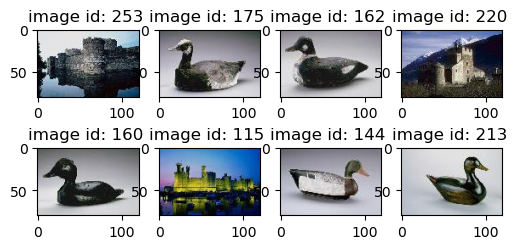

In [19]:
import random
fig = plt.figure(figsize=(6, 6), dpi=100)
id=random.sample(range(len(loaded_images)), 8)
for i in range(8):
    ax1 = fig.add_subplot(4,4 , i+1)
    plt.imshow(loaded_images[id[i]])
    ax1.set_title('image id: %s '% (id[i]))

## Afficher un image de base avec histogamme 

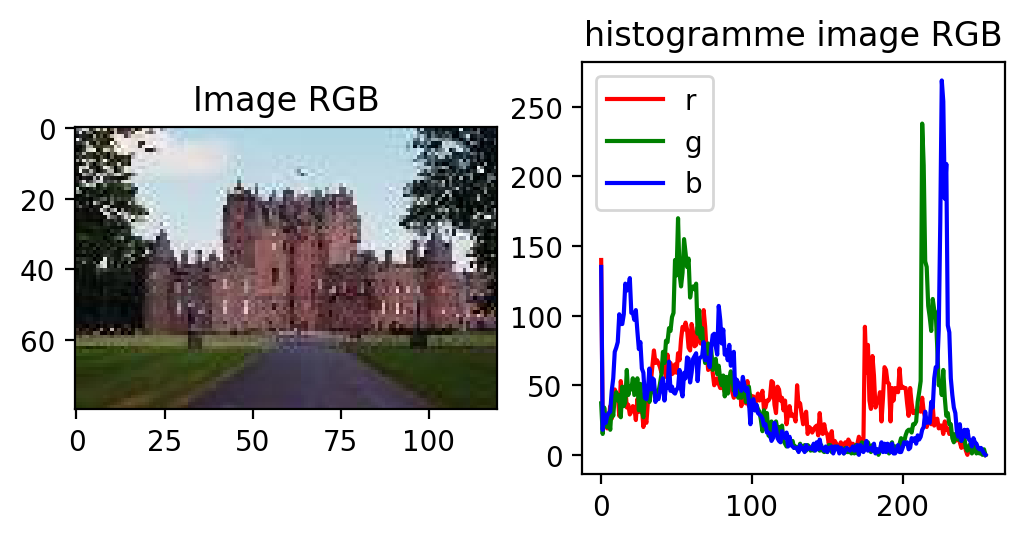

In [20]:
#Traille sur l'image id = 83
import cv2

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 2, 1)

plt.imshow(loaded_images[83])
ax1.set_title("Image RGB")

img=loaded_images[83][:,:,0],loaded_images[83][:,:,1],loaded_images[83][:,:,2]

#r, g, b = imagergb[:,:,0], imagergb[:,:,1], imagergb[:,:,2]

#hist_r = cv2.calcHist([r],[0],None,[256],[0,255])
#hist_g = cv2.calcHist([g],[0],None,[256],[0,255])
#hist_b = cv2.calcHist([b],[0],None,[256],[0,255])

hist_r=cv2.calcHist(img,[0],None,[256],[0,255]) # 1:image , 2:canal [0]ou [1]ou [2] , 3: si tu a interse afficher un région dans un image ,4 : le nombre des bins(L’histogramme d’une image donnée peut être divisé en 16 sous-parties et la somme de tous les pixels de la sous-partie est appelée BIN représentée par histSize) ,5: La plage de paramètres spécifie la plage de valeurs d’intensité dont la valeur est normalement [0,256].  
hist_g=cv2.calcHist(img,[1],None,[256],[0,255])
hist_b=cv2.calcHist(img,[2],None,[256],[0,255])

ax1 = fig.add_subplot(2, 2, 2)
ax1.set_title("histogramme image RGB")

plt.plot(hist_r,color='r',label="r")
plt.plot(hist_g,color='g',label="g")
plt.plot(hist_b,color='b',label="b")
plt.legend()
plt.show()

## Converter les images de base a RGB vers HSV Et Afficher un image de base et calcule histo

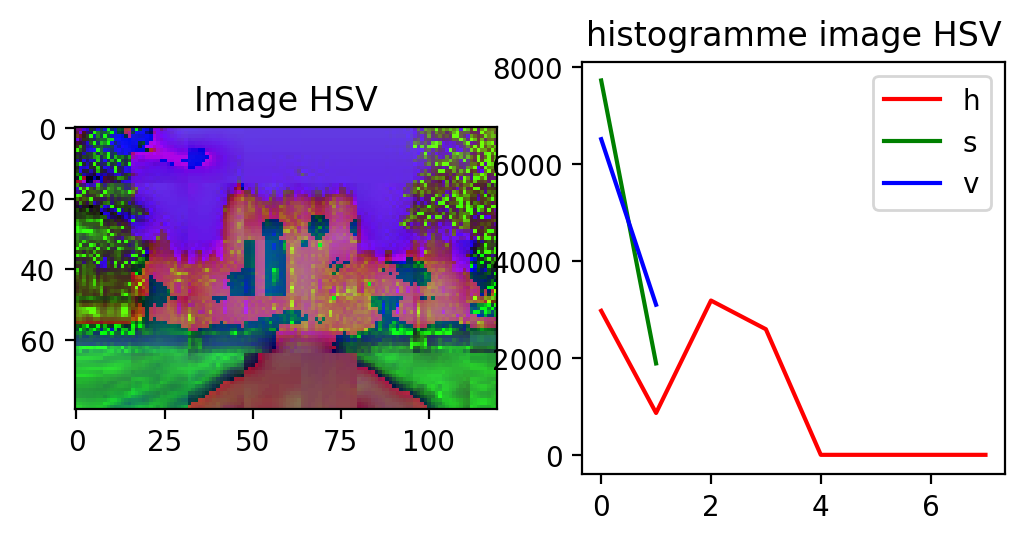

In [21]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 2, 1)


imgs_hsv=cv2.cvtColor(loaded_images[83],cv2.COLOR_RGB2HSV)    #Converter les images de base a RGB 

plt.imshow(imgs_hsv)
ax1.set_title("Image HSV")


img=imgs_hsv[:,:,0],imgs_hsv[:,:,1],imgs_hsv[:,:,2]

#r, g, b = imagergb[:,:,0], imagergb[:,:,1], imagergb[:,:,2]

#hist_r = cv2.calcHist([r],[0],None,[256],[0,255])
#hist_g = cv2.calcHist([g],[0],None,[256],[0,255])
#hist_b = cv2.calcHist([b],[0],None,[256],[0,255])

hist_r=cv2.calcHist(img,[0],None,[8], [0, 360]) # 1:image , 2:canal [0]ou [1]ou [2] , 3: si tu a interse afficher un région dans un image ,4 : le nombre des bins(L’histogramme d’une image donnée peut être divisé en 16 sous-parties et la somme de tous les pixels de la sous-partie est appelée BIN représentée par histSize) ,5: La plage de paramètres spécifie la plage de valeurs d’intensité dont la valeur est normalement [0,256].  
hist_g=cv2.calcHist(img,[1],None,[2], [0, 256])
hist_b=cv2.calcHist(img,[2],None,[2], [0, 256])

ax1 = fig.add_subplot(2, 2, 2)
ax1.set_title("histogramme image HSV")

plt.plot(hist_r,color='r',label="h")
plt.plot(hist_g,color='g',label="s")
plt.plot(hist_b,color='b',label="v")
plt.legend()
plt.show()



### featurs d'un seul image 

In [22]:
#hist_hsv=cv2.calcHist(img,[0,1,2],None,[8,2,2],[0,360,0,255,0,255]) # histogramme return un tableaux de dim 1x32 vecteur de featuars
#features=hist_hsv.flatten()
#hist_hsv.shape

## On converter tous les images de Base a HSV et Extraire les features

In [23]:
def getHsvHistogramFeatures(img):
    
    img_hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    hist_hsv=cv2.calcHist(img_hsv,[0,1,2],None,[8,2,2],[0,360,0,255,0,255]) #il retourn un matrice de dimention 1x(8x2x2 =32)=>1x32
    return hist_hsv.flatten()
    #features=[]
    #for i in range(len(imgs_hsv)):
        #hist_hsv=cv2.calcHist(imgs_hsv[i],[0,1,2],None,[8,2,2],[0,360,0,255,0,255])
        #features.append(hist_hsv.flatten())
    #return features

## -- Afficher les images  5 images les plus similaires , On  utilisent just les vecteurs caractéristiques par forme 

In [24]:
def indexHsvHistogramFeatures():#iNDEXATION TOUS LES IMAGES DE BASE
    featuresHistogram=[]
    for i in range(len(loaded_images)):
        
        featuresHistogramImg=getHsvHistogramFeatures(loaded_images[i])
        featuresHistogram.append(featuresHistogramImg)
    return featuresHistogram

In [25]:
 #extraire les features de images de base index 

indexHsvHistogramFeatures=indexHsvHistogramFeatures()

In [26]:
def RechercheImageRequete(img_requete ,indexHsvHistogramFeatures  ):
    
    #extraction des features d'image requete 
    featurs_imageRequete= getHsvHistogramFeatures(img_requete)
    
    # On parcours tous les moments de la base d'indexation et calculer la distance entre la vecteur image requete et les vecteurs des images base 
    distances={}
    for i in range(np.shape(indexHsvHistogramFeatures)[0]):
        distances[i]=dist.euclidean(featurs_imageRequete,indexHsvHistogramFeatures[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

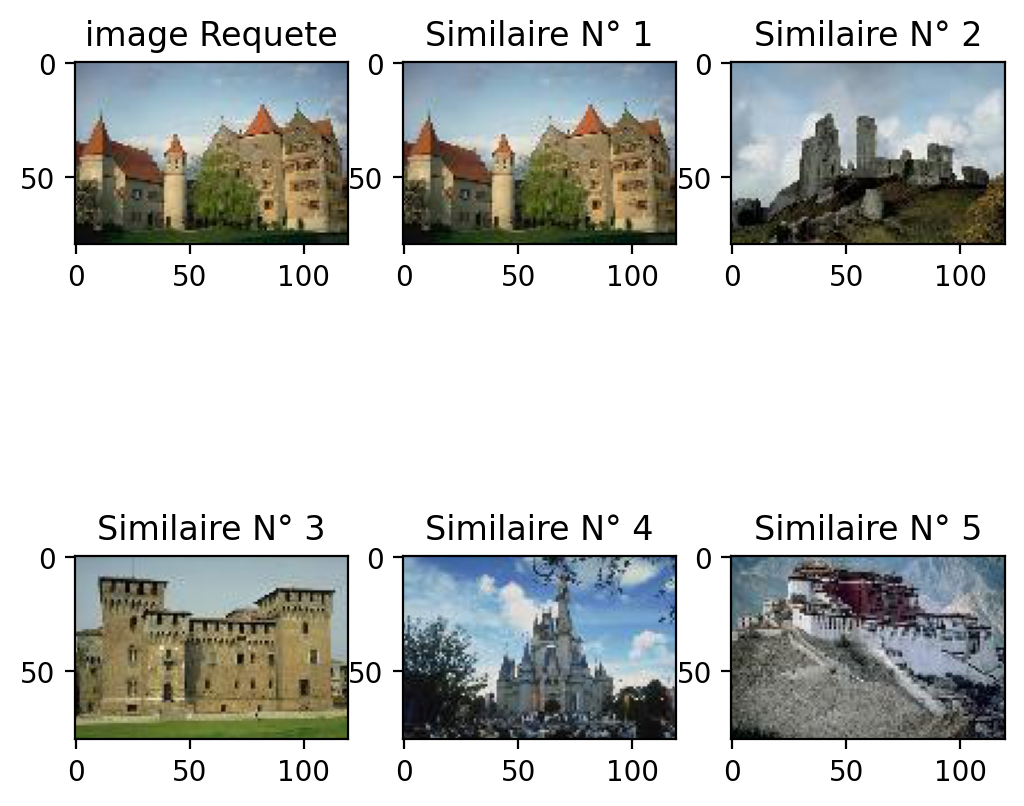

In [27]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")

e=RechercheImageRequete(img_requete ,indexHsvHistogramFeatures  )

for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

## Apres extraction des features d'histogramme ,On va Concaténer les deux vecteurs descripteurs de moments et d’histogramme ,  créer une base d’index à base des caractéristiques des images de la base

In [28]:
def indexation_base():
    features=[]
    for i in range(len(loaded_images)):
        #print(hsvHistogramFeatures(imgs_hsv[i]))
        features.append(np.concatenate((color_Moments(loaded_images[i]),getHsvHistogramFeatures(loaded_images[i])))) #Concaténer les deux vecteurs descripteurs de moments et d’histogramme 
    #features=np.concatenate(featuresMoments,featuresHist)
    #type(featuresMoments)
    #type(featuresHist)
    #return features
    return features

 ## dim de vecteur des caractéristiques  270: images et 38 : caractéristiques = (6 moments + 32 caractéristiques d'istogramme )

In [29]:
np.shape(indexation_base())

(270, 38)

In [30]:
indexation_base=indexation_base() # Indexation hors ligne

## Maintenant j'ai commencé à chercher sur l'image requete par la fonction Rechercher

In [31]:
def rechercher_imgRequete(img_requete , index_features):
    # Extraction des features d'image requete
    
    feature_imgRequet=np.concatenate((color_Moments(img_requete),getHsvHistogramFeatures(img_requete)))
    
    distances={}
    for i in range(np.shape(index_features)[0]):
        distances[i]=dist.euclidean(feature_imgRequet,index_features[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

## Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

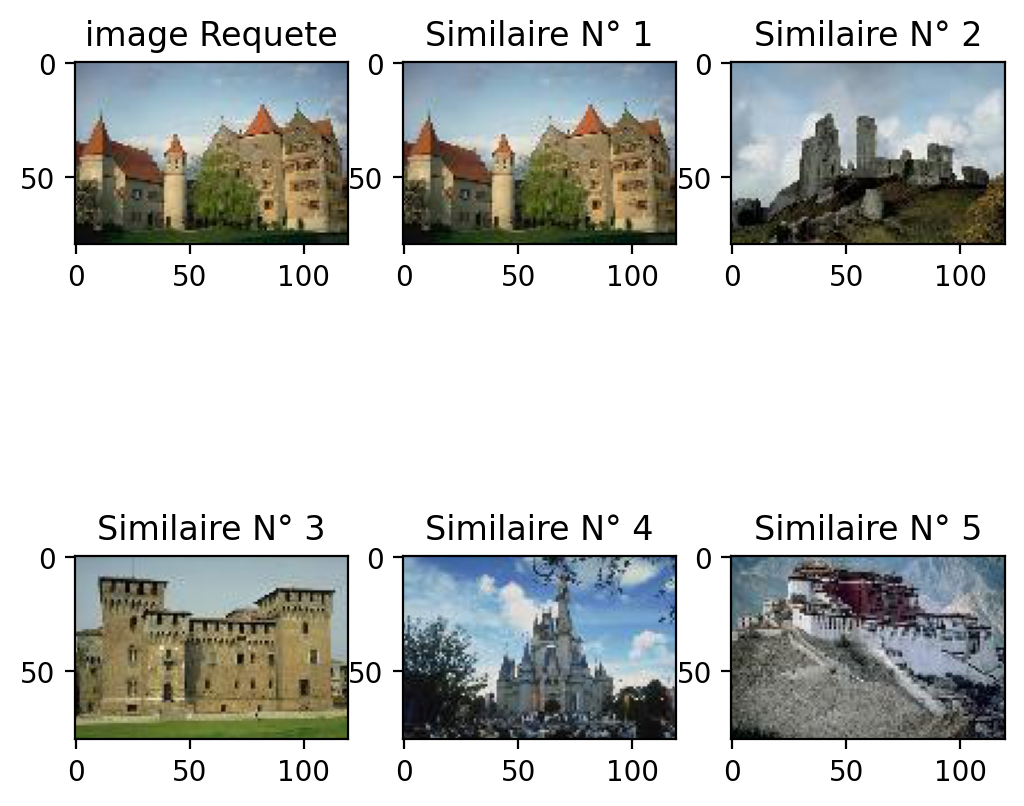

In [32]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")
e=rechercher_imgRequete(img_requete ,indexation_base )
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

In [33]:
# Python3 program change RGB Color
# Model to HSV Color Model
#https://www.geeksforgeeks.org/program-change-rgb-color-model-hsv-color-model/
"""def normalize_hsv(h,s, v):
    return int(h*8/360),int(s*2/100),int(v*2/100)

def rgb_to_hsv(r, g, b):
 
    # R, G, B values are divided by 255
    # to change the range from 0..255 to 0..1:
    r, g, b = r / 255.0, g / 255.0, b / 255.0
 
    # h, s, v = hue, saturation, value
    cmax = max(r, g, b)    # maximum of r, g, b
    cmin = min(r, g, b)    # minimum of r, g, b
    diff = cmax-cmin       # diff of cmax and cmin.
 
    # if cmax and cmax are equal then h = 0
    if cmax == cmin:
        h = 0
     
    # if cmax equal r then compute h
    elif cmax == r:
        h = (60 * ((g - b) / diff) + 360) % 360
 
    # if cmax equal g then compute h
    elif cmax == g:
        h = (60 * ((b - r) / diff) + 120) % 360
 
    # if cmax equal b then compute h
    elif cmax == b:
        h = (60 * ((r - g) / diff) + 240) % 360
 
    # if cmax equal zero
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * 100
 
    # compute v
    v = cmax * 100
    return normalize_hsv(int(h), int(s), int(v)) 
 

# print(rgb_to_hsv(45, 215, 0))
# print(rgb_to_hsv(31, 52, 29))
x=rgb_to_hsv(256, 0,10)
#int(x[0])
x"""

'def normalize_hsv(h,s, v):\n    return int(h*8/360),int(s*2/100),int(v*2/100)\n\ndef rgb_to_hsv(r, g, b):\n \n    # R, G, B values are divided by 255\n    # to change the range from 0..255 to 0..1:\n    r, g, b = r / 255.0, g / 255.0, b / 255.0\n \n    # h, s, v = hue, saturation, value\n    cmax = max(r, g, b)    # maximum of r, g, b\n    cmin = min(r, g, b)    # minimum of r, g, b\n    diff = cmax-cmin       # diff of cmax and cmin.\n \n    # if cmax and cmax are equal then h = 0\n    if cmax == cmin:\n        h = 0\n     \n    # if cmax equal r then compute h\n    elif cmax == r:\n        h = (60 * ((g - b) / diff) + 360) % 360\n \n    # if cmax equal g then compute h\n    elif cmax == g:\n        h = (60 * ((b - r) / diff) + 120) % 360\n \n    # if cmax equal b then compute h\n    elif cmax == b:\n        h = (60 * ((r - g) / diff) + 240) % 360\n \n    # if cmax equal zero\n    if cmax == 0:\n        s = 0\n    else:\n        s = (diff / cmax) * 100\n \n    # compute v\n    v = cm

In [34]:
"""def getRGB(img):
    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]
    return R,G,B
r,g,b=getRGB(loaded_images[83])
np.shape(r)[0] """

'def getRGB(img):\n    R=img[:,:,0]\n    G=img[:,:,1]\n    B=img[:,:,2]\n    return R,G,B\nr,g,b=getRGB(loaded_images[83])\nnp.shape(r)[0] '

In [35]:
#print(r.shape)

In [36]:
#np.shape(s)

In [37]:
#r

In [38]:
#loaded_images[83][:,:,0]

In [39]:
#loaded_images[83][:,:,2]

In [40]:
#loaded_images[83]

In [41]:
#import cv2 

#hsv_image = cv2.cvtColor(loaded_images[83], cv2.COLOR_RGB2HSV)
#plt.imshow(hsv_image)
#np.shape(hsv_image)

<h1>3.5 Recherche par forme<h1><br/>
    <h4>Les 7 moments sont calculés à l’aide des formules ( la dim de vecteur descripteur 1x7) suivantes :</h4>
    <img src="mement hu.PNG" whith="50px" height="5px"><br.>
    <h4>Ou Bien utiliser des methodes predéfinir dans OpenCV pour extraire les 7 moments de Hu :</h4><br/>
    <code>
        # Read image as grayscale image 
          im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
        # Threshold image 
          _,im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY) 
        # Calculate Moments  
         moments = cv2.moments(im) 
        # Calculate Hu Moments 
          huMoments = cv2.HuMoments(moments)
    </code>
    

In [42]:
#import cv2
img_gray = cv2.cvtColor(img_requete, cv2.COLOR_BGR2GRAY)


In [43]:
_,img=cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY ) #+cv2.THRESH_OTSU

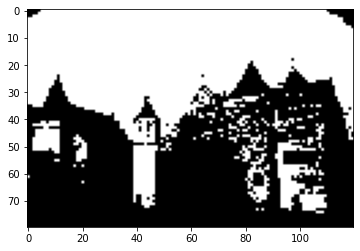

In [44]:
plt.imshow(img, cmap="gray") 

In [45]:
def extractionMoments(img_originale):
    img_gray = cv2.cvtColor(img_originale, cv2.COLOR_BGR2GRAY)
    _,img=cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY )
    
    moments = cv2.HuMoments(cv2.moments(img)).flatten()
    #print("ORIGINAL MOMENTS: {}".format(moments
    return moments

<h3>Notez que hu[0] n’est pas comparable en magnitude à hu[6]. 
Nous pouvons utiliser une transformation logarithmique donnée ci-dessous pour les amener dans la même plage</h3>

In [46]:
# Log scale hu moments 
import math

def increaseValueMoments(moments):
    for i in range(0,7):
        moments[i] = -1* math.copysign(1.0, moments[i]) * math.log10(abs(moments[i]))
        #cv2.imwrite("ib.png",img)
    return moments

In [47]:
def getFeaturesShape(img):
    #featuresMoments=[]
    #for i in range(len(loaded_images)): # On parcours tous les images de base
        
    moments=extractionMoments(img)
    moments=increaseValueMoments(moments)
        
        #featuresMoments.append(moments)
    return moments

In [48]:
#np.shape(getFeaturesShape())[0]

In [49]:
def indexFeaturesShape():#iNDEXATION TOUS LES IMAGES DE BASE
    featuresMoments=[]
    for i in range(len(loaded_images)):
        
        momentsImg=getFeaturesShape(loaded_images[i])
        featuresMoments.append(momentsImg)
    return featuresMoments

In [50]:
indexFeaturesMoments=indexFeaturesShape()#iNDEXATION TOUS LES IMAGES DE BASE

In [51]:
np.shape(indexFeaturesMoments)[0]

270

In [52]:

def RechercheImageRequete(image_Requete ,indexFeaturesMoments  ):
    
    #extraction des features d'image requete 
    moments_imageRequete= getFeaturesShape(image_Requete)
    
    # On parcours tous les moments de la base d'indexation et calculer la distance entre la vecteur image requete et les vecteurs des images base 
    distances={}
    for i in range(np.shape(indexFeaturesMoments)[0]):
        distances[i]=dist.euclidean(moments_imageRequete,indexFeaturesMoments[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

In [53]:
#RechercheImageRequete(img_requete ,e  )

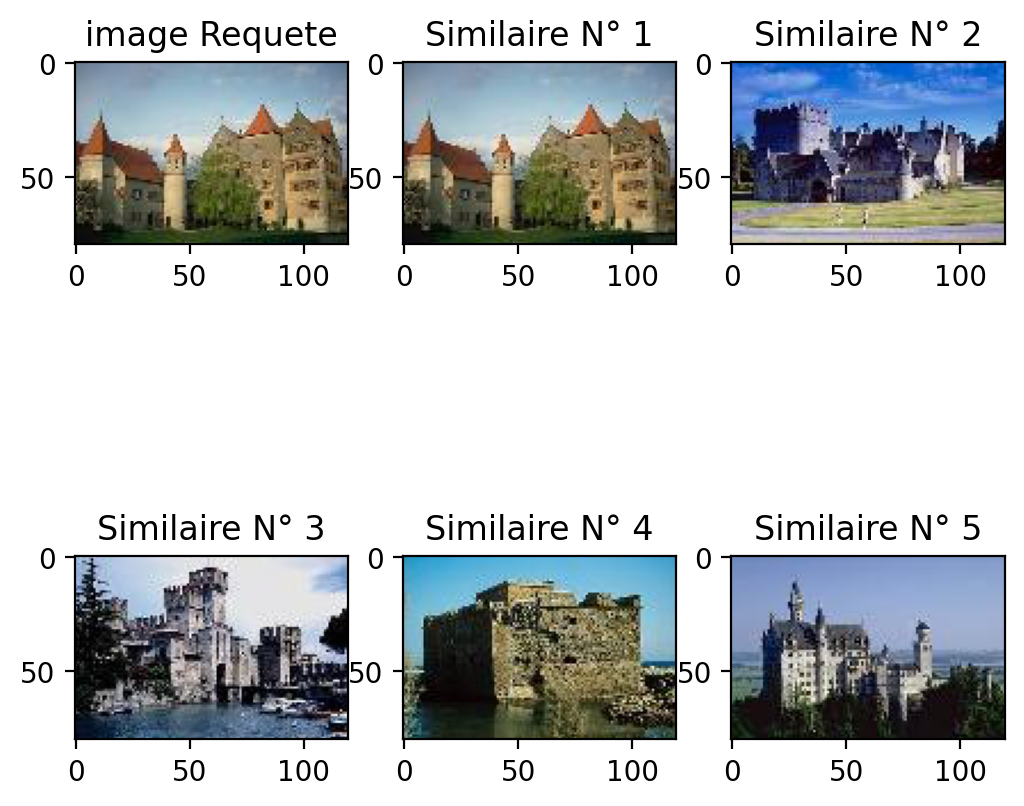

In [54]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")
e=RechercheImageRequete(img_requete ,indexFeaturesMoments  )
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

<h3>----------------------------------------------------------------------------------------------------------------------------------------------------------------- Apres extraction des features de la forme  ,
On va Concaténer les deux vecteurs descripteurs un vecteurs qui contient les caractéristiques de moments et d’histogramme , et la vecteurs de la forme . finalement 
créer une base d’index à base des caractéristiques des images de la base : Dim vect =1x(6+32+7)=1x45 </h3>

In [55]:
def indexation_base():
    features=[]
    for i in range(len(loaded_images)):
        #print(hsvHistogramFeatures(imgs_hsv[i]))
        features.append(np.concatenate((color_Moments(loaded_images[i]),getHsvHistogramFeatures(loaded_images[i]),getFeaturesShape(loaded_images[i])))) #Concaténer les deux vecteurs descripteurs de moments et d’histogramme 
    #features=np.concatenate(featuresMoments,featuresHist)
    #type(featuresMoments)
    #type(featuresHist)
    #return features
    return features

In [56]:
indexation_baseFeatures=indexation_base() # Indexation hors ligne (apres la Concaténation )

In [57]:
def rechercher_imgRequete(img_requete , index_features):
    # Extraction des features d'image requete
    feature_imgRequet=np.concatenate((color_Moments(img_requete),getHsvHistogramFeatures(img_requete) ,getFeaturesShape(img_requete) )) #Concatenation
    
    
    
    distances={}
    for i in range(np.shape(index_features)[0]):
        distances[i]=dist.euclidean(feature_imgRequet,index_features[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

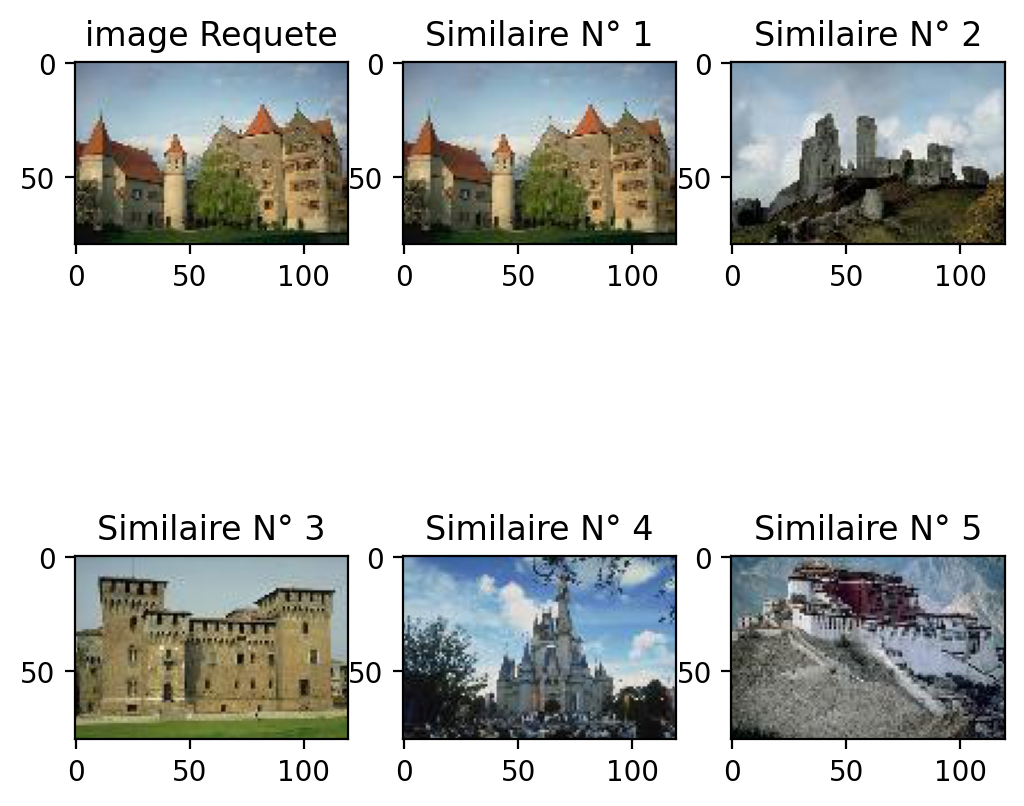

In [58]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")
e=rechercher_imgRequete(img_requete ,indexation_baseFeatures )
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

<h1>3.5 Recherche par texture <h1><br/>
    1 - <a href="https://sourceexample.com/article/en/cad76b26f0627fb94e787be4439f1e05/">Lien 1 sur L'article Texture </a><br><br><br>
    2 - <a href="https://yunusmuhammad007.medium.com/feature-extraction-gray-level-co-occurrence-matrix-glcm-10c45b6d46a1">Lien2  sur L'article Texture </a>
    

In [59]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import cv2

In [72]:
#img = img_requete



#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#image = img_as_ubyte(gray)
#io.imshow(image)

#bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
#inds = np.digitize(image, bins)




#gray: image deux dimension (niveaux de gris )
#[1]: distance (ou bien le bas entre un)
#[0, np.pi/4, np.pi/2, 3*np.pi/4] : Les angles entre les pixels [0,360], si prendre un valeure la fonction 'greycomatrix()' retourne un seul valeur si non il retourn yn tableaux des valeurs 
#matrix_coocurrence = greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)


#matrix_coocurrence = greycomatrix(gray, [1], [0], levels=256, normed=False, symmetric=False) 

# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return  contrast

def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')    
    return  dissimilarity

def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return  homogeneity

def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return  energy

def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return  correlation


def entropy_feature(matrix_coocurrence):
    entropy = greycoprops(matrix_coocurrence, 'entropy')
    return "Entropy = ", entropy


def getFeaturesTextur(img):
    freaturesTexturs=[]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    matrix_coocurrence = greycomatrix(gray, [1], [0], levels=256, normed=False, symmetric=False) 
    
    freaturesTexturs.append(contrast_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(homogeneity_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(energy_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(correlation_feature(matrix_coocurrence)[0][0])
    
    return freaturesTexturs
    
"""print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))"""


'print(contrast_feature(matrix_coocurrence))\nprint(dissimilarity_feature(matrix_coocurrence))\nprint(homogeneity_feature(matrix_coocurrence))\nprint(energy_feature(matrix_coocurrence))\nprint(correlation_feature(matrix_coocurrence))'

<h4> la dimension de vecteur descripteur c'est :1x4  </h4>

In [75]:
np.shape(getFeaturesTextur(img_requete))

(4,)

<h4>INDEXATION TOUS LES IMAGES DE BASE</h4>

In [76]:
def indexTextursFeatures():#iNDEXATION TOUS LES IMAGES DE BASE
    featuresTextur=[]
    for i in range(len(loaded_images)):
        
        featureTextur=getFeaturesTextur(loaded_images[i])
        featuresTextur.append(featureTextur)
    return featuresTextur

In [77]:
indexTextursFeatures=indexTextursFeatures()

In [79]:
np.shape(indexTextursFeatures)

(270, 4)

In [80]:

def RechercheImageRequete(image_Requete ,indexTextursFeatures  ):
    
    #extraction des features d'image requete 
    featurTextur_imageRequete= getFeaturesTextur(image_Requete)
    
    # On parcours tous les moments de la base d'indexation et calculer la distance entre la vecteur image requete et les vecteurs des images base 
    distances={}
    for i in range(np.shape(indexTextursFeatures)[0]):
        distances[i]=dist.euclidean(featurTextur_imageRequete,indexTextursFeatures[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

##  Recherche par Texture 

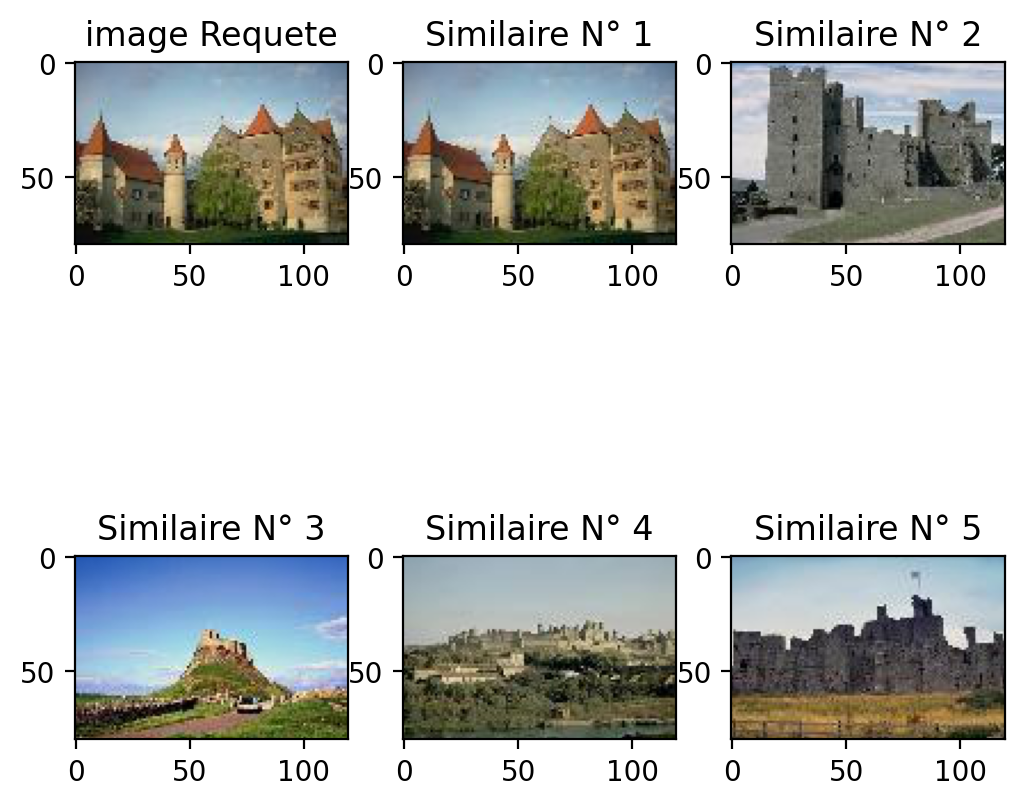

In [81]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")
e=RechercheImageRequete(img_requete ,indexTextursFeatures  )
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

## Finalement On va concaténer le vecteur caracteristique de texture avec le vecteur caracteristique de coleur et la forme 

In [82]:
def indexation_base():
    features=[]
    for i in range(len(loaded_images)):
        features.append(np.concatenate((color_Moments(loaded_images[i]),getHsvHistogramFeatures(loaded_images[i]),getFeaturesShape(loaded_images[i])  , getFeaturesTextur(loaded_images[i])) )) #Concaténer les deux vecteurs descripteurs de moments et d’histogramme,form,texture 
    
    return features

In [83]:
indexation_baseFeatures=indexation_base() # Indexation hors ligne (apres la Concaténation )

## -------------------------------------------------------------------------------------------------------------------------

In [84]:
def rechercher_imgRequete(img_requete , index_features):
    # Extraction des features d'image requete
    feature_imgRequet=np.concatenate((color_Moments(img_requete) , getHsvHistogramFeatures(img_requete) ,getFeaturesShape(img_requete) , getFeaturesTextur(img_requete))) #Concatenation
    
    
    distances={}
    for i in range(np.shape(index_features)[0]):
        distances[i]=dist.euclidean(feature_imgRequet,index_features[i])
    s=[]
    for key,value in sorted(distances.items(),key=lambda x: x[1]):
        #print("%s %s" % (key,value))
        s.append(key)
    return s

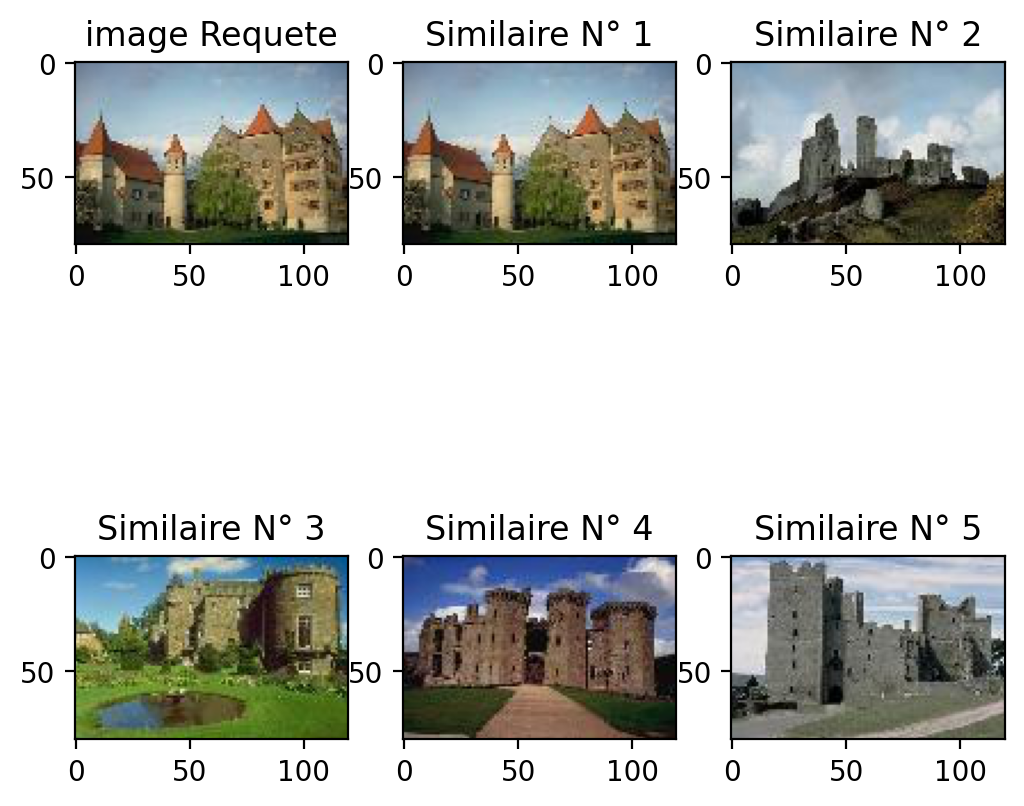

In [85]:
fig =plt.figure(figsize=(6,6),dpi=200)
ax1=fig.add_subplot(2,3,1)
ax1.imshow(img_requete)
ax1.set_title("image Requete")
e=rechercher_imgRequete(img_requete ,indexation_baseFeatures )
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

In [90]:
np.shape(indexation_base())

(270, 49)

<h1>----------------------------------------------------------------------------------------------------</h1>

In [62]:
np.shape(indexation_baseFeatures)

(270, 45)

In [63]:
indexation_baseFeatures

[array([130.70520833,  57.08014992, 135.18479167,  57.35566866,
        132.65145833,  67.15136647, 187.        ,   0.        ,
          1.        ,   0.        ,  33.        ,   0.        ,
          0.        ,   0.        ,  14.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          4.        ,  13.        ,   0.        ,   0.        ,
          0.        , 102.        ,   0.        ,   0.        ,
          0.        ,   6.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   2.97022195,   6.34596934,
         11.08454956,  10.79489265,  21.75916846, -14.89562687,
         22.22008517]),
 array([131.61010417,  40.58993566, 131.5675    ,  43.30415716,
        102.95052083,  56.16750571,  54.        ,   0.        ,
          0.        ,   0.        ,  66.        ,   0.        ,
          0.        ,   0.        , 120.        ,   0.        ,
          0.    